PROBLEM STATEMENT

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


LOADING DATASET

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data.shape


(550068, 12)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


##checking null values


In [ ]:
data.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [ ]:
data.nunique()


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

EDA

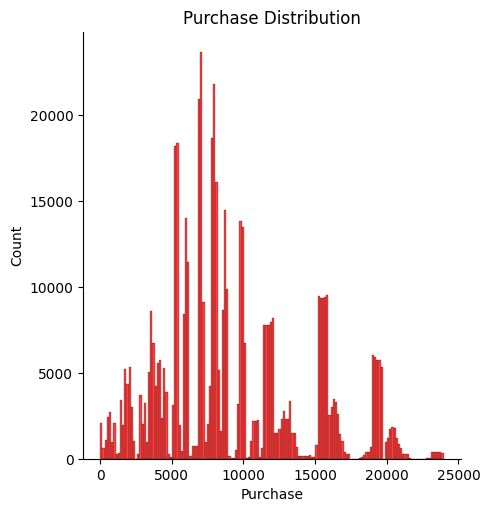

In [ ]:
sns.displot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

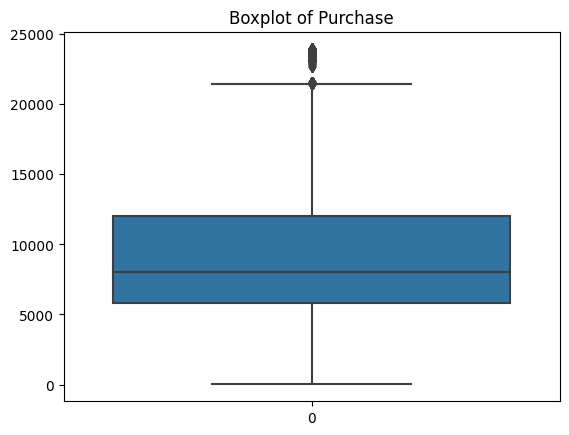

In [ ]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()


In [ ]:
data["Purchase"].skew()


0.6001400037087128

In [ ]:
data["Purchase"].kurtosis()


-0.3383775655851702

In [ ]:
data["Purchase"].describe()


count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

GENDER

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()


In [ ]:
data['Gender'] = le.fit_transform(data['Gender'])


In [ ]:
data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


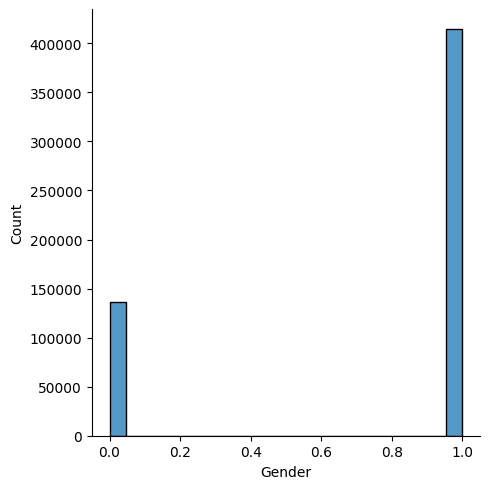

In [ ]:
sns.displot(data.Gender)

In [ ]:
data['Gender'].value_counts(normalize=True)*100


1    75.310507
0    24.689493
Name: Gender, dtype: float64

In [ ]:
data.groupby("Gender").mean()["Purchase"]


<ipython-input-28-b2e65a1fdba5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Gender").mean()["Purchase"]


Gender
0    8734.565765
1    9437.526040
Name: Purchase, dtype: float64

Marital Status

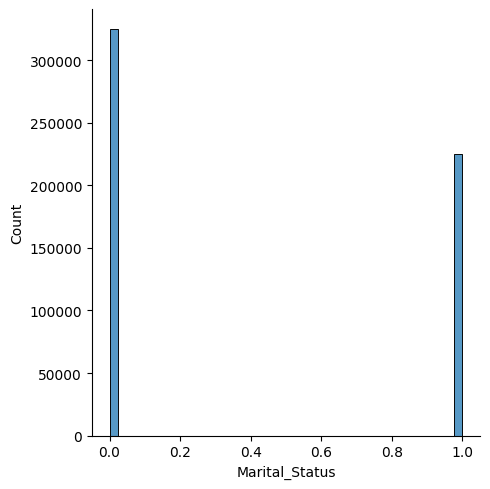

In [ ]:
sns.displot(data.Marital_Status)

In [ ]:
data.groupby("Marital_Status").mean()["Purchase"]


<ipython-input-32-31d44c22c089>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Marital_Status").mean()["Purchase"]


Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

<ipython-input-33-d65f190cb4ac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')


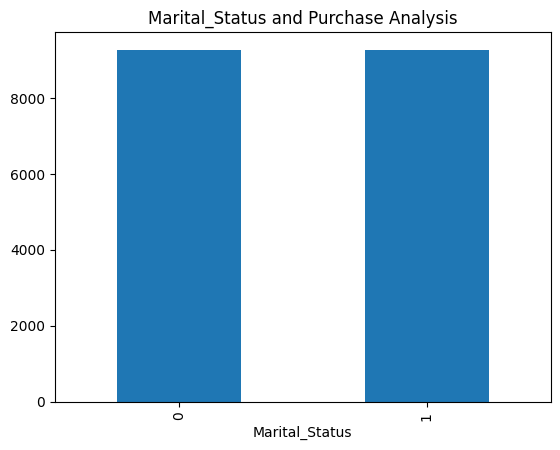

In [ ]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()


OCCUPATION

<Figure size 1800x500 with 0 Axes>

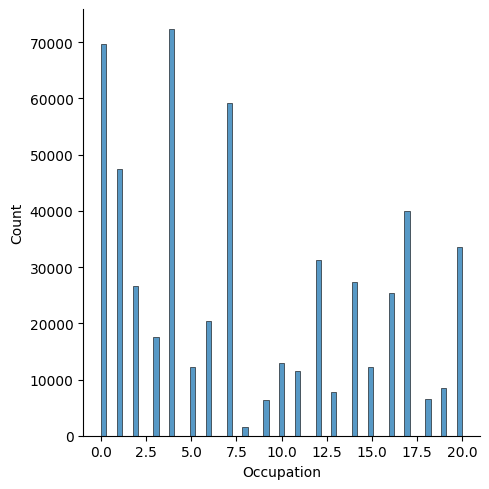

In [ ]:
plt.figure(figsize=(18,5))
sns.displot(data['Occupation'])
plt.show()


In [ ]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup


<ipython-input-36-ba0fa628b3cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])


,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


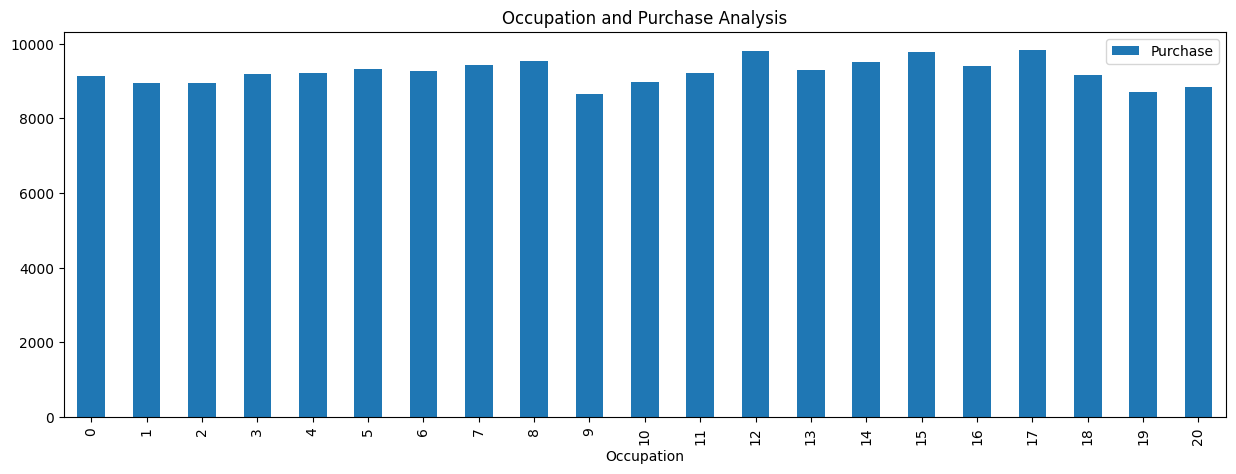

In [ ]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()


CITY_CATEGORY

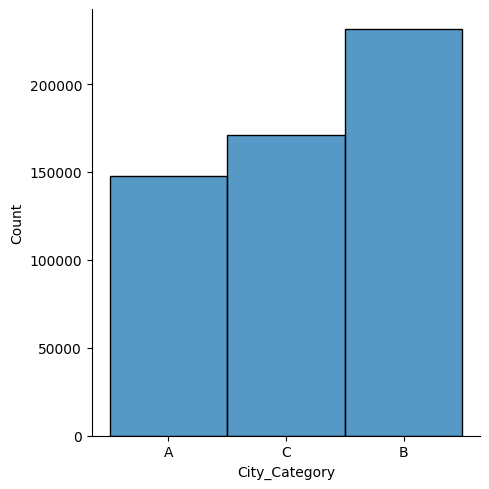

In [ ]:
sns.displot(data['City_Category'])
plt.show()


<ipython-input-39-58626dcd7ac5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')


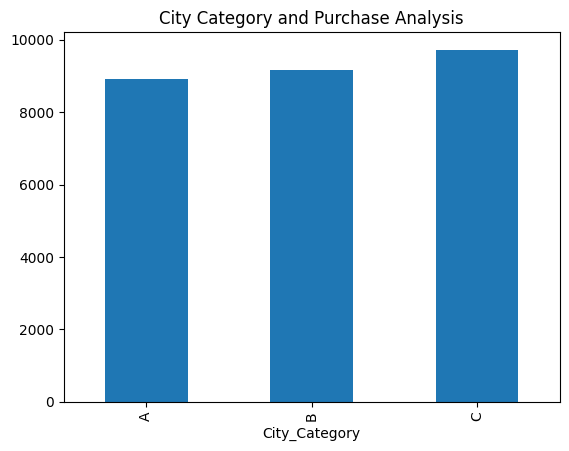

In [ ]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()


Stay_In_Current_City_Years

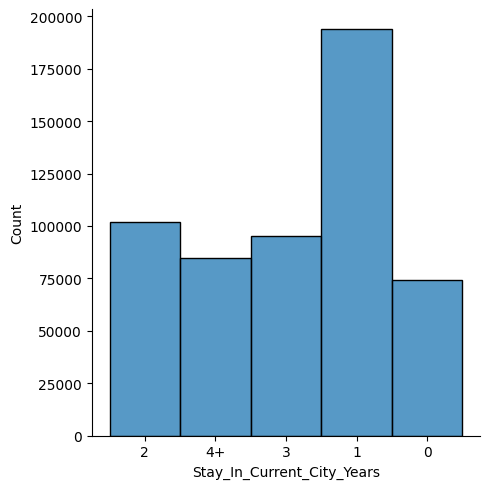

In [ ]:
sns.displot(data['Stay_In_Current_City_Years'])
plt.show()

<ipython-input-41-8881a1cfbbfa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')


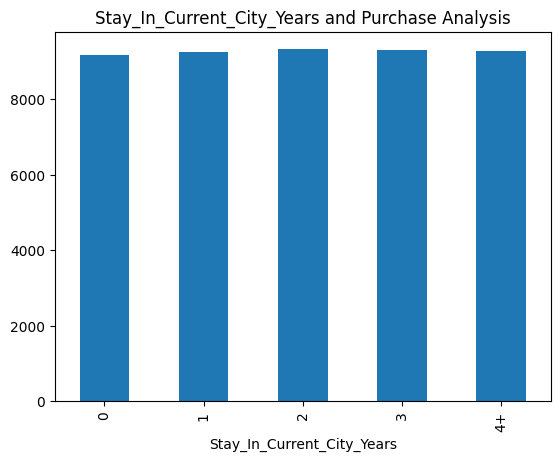

In [ ]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()


AGE

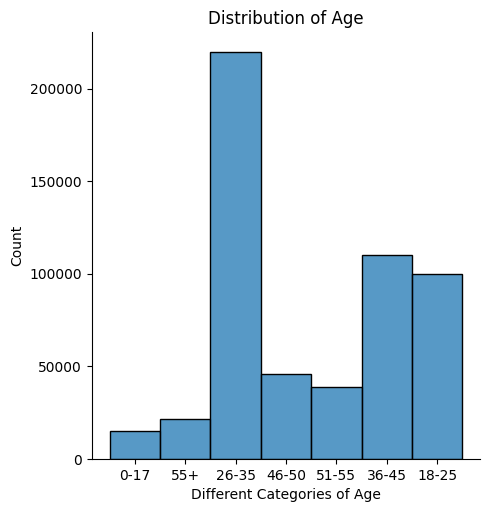

In [ ]:
sns.displot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

<ipython-input-43-a6282516d799>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Age").mean()["Purchase"].plot(kind='bar')


<Axes: xlabel='Age'>

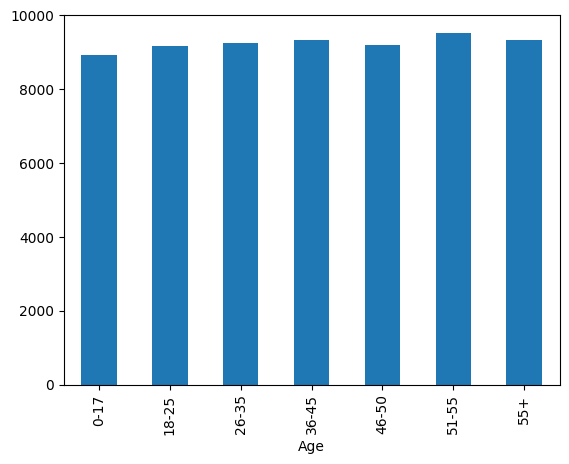

In [ ]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')


<ipython-input-44-9b7c564ccc55>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Age").sum()['Purchase'].plot(kind="bar")


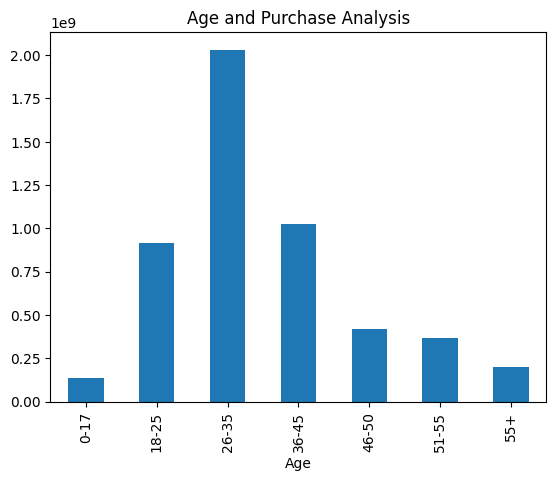

In [ ]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()


Product_Category_1

<Figure size 1800x500 with 0 Axes>

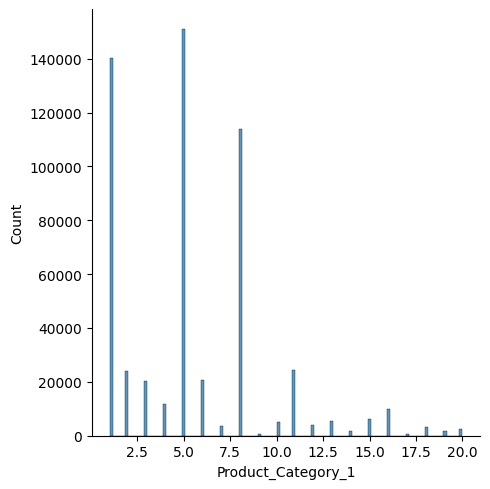

In [ ]:
plt.figure(figsize=(18,5))
sns.displot(data['Product_Category_1'])
plt.show()

<ipython-input-47-de84b08f4468>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))


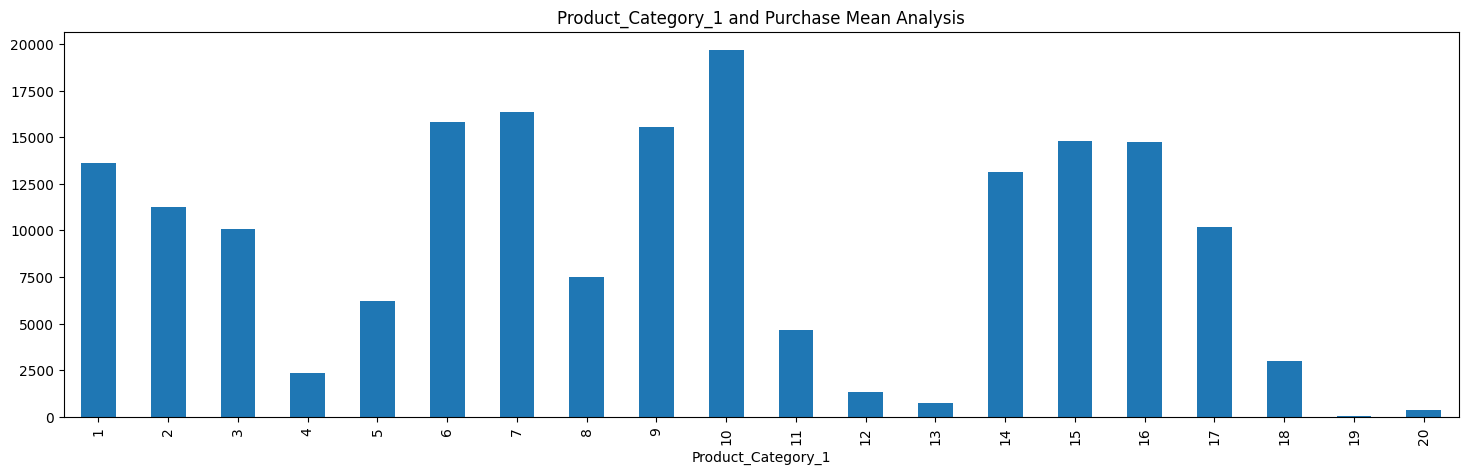

In [ ]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()


<ipython-input-48-48ef0f049c6f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))


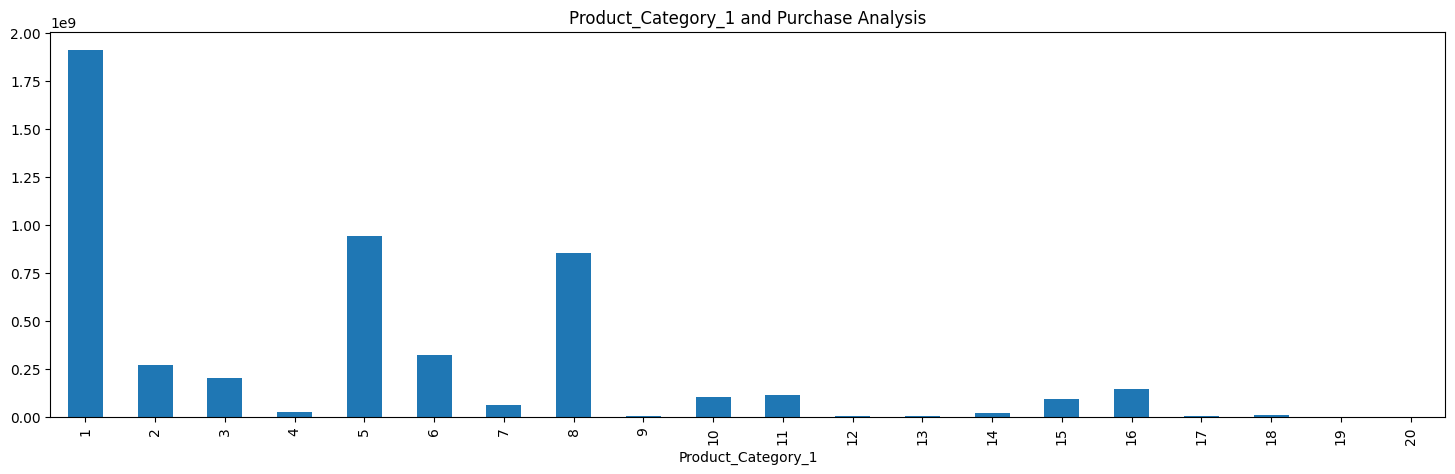

In [ ]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()


Product_Category_2

<Figure size 1800x500 with 0 Axes>

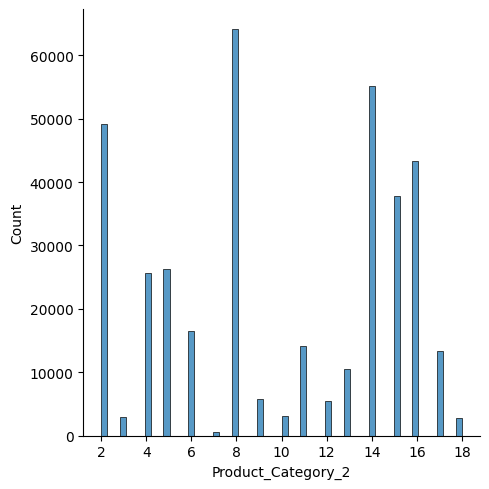

In [ ]:
plt.figure(figsize=(18,5))
sns.displot(data['Product_Category_2'])
plt.show()


Product_Category_3


<Figure size 1800x500 with 0 Axes>

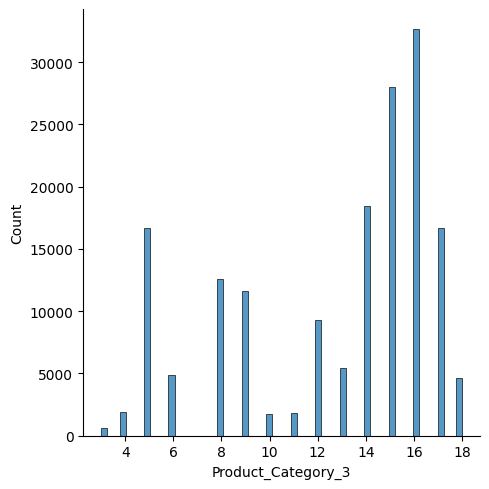

In [ ]:
plt.figure(figsize=(18,5))
sns.displot(data['Product_Category_3'])
plt.show()


In [ ]:
data.corr()


<ipython-input-53-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.033474,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Gender,-0.033474,1.000000,0.117291,-0.011603,-0.045594,-0.018591,0.028069,0.060346
Occupation,-0.023971,0.117291,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,-0.011603,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.045594,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.018591,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.028069,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.060346,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


HeatMap

<ipython-input-54-dff020e25490>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


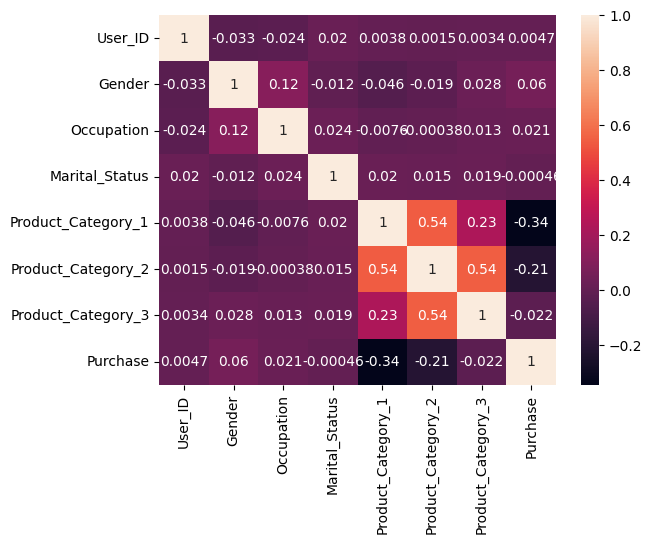

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()


In [ ]:
data.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df = data.copy()


In [ ]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])


In [ ]:
df['Age'] = le.fit_transform(df['Age'])


In [ ]:
df['City_Category'] = le.fit_transform(df['City_Category'])


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [ ]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')


In [ ]:
df.isnull().sum()


User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int64 
 3   Age                            550068 non-null  int64 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int64 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  uint8 
 12  Stay_In_Current_City_Years_1   550068 non-nu

In [ ]:
df = df.drop(["User_ID","Product_ID"],axis=1)


In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0,0,8370,0,0,1,0,0
1,0,0,10,0,0,1,6,14,15200,0,0,1,0,0
2,0,0,10,0,0,12,0,0,1422,0,0,1,0,0
3,0,0,10,0,0,12,14,0,1057,0,0,1,0,0
4,1,6,16,2,0,8,0,0,7969,0,0,0,0,1


LINEAR REGRESSION

In [ ]:
X = df.drop("Purchase",axis=1)


In [ ]:
y=df['Purchase']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
lr.intercept_


9536.400764131593

In [ ]:
lr.coef_


array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred)


3532.069226165843

In [ ]:
mean_squared_error(y_test, y_pred)


21397853.26940751

In [ ]:
r2_score(y_test, y_pred)


0.15192944521481688

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))


RMSE of Linear Regression Model is  4625.781368526566


DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)


In [ ]:
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [ ]:
dt_y_pred = regressor.predict(X_test)


In [ ]:
mean_absolute_error(y_test, dt_y_pred)


2372.0357559134654

In [ ]:
mean_squared_error(y_test, dt_y_pred)


11300579.466797074

In [ ]:
r2_score(y_test, dt_y_pred)


0.5521191505924365

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))


RMSE of Linear Regression Model is  3361.633452177241


XGBOOST REGRESSOR

In [ ]:
from xgboost.sklearn import XGBRegressor


In [ ]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb_y_pred = xgb_reg.predict(X_test)


In [ ]:
mean_absolute_error(y_test, xgb_y_pred)


2144.8588298827412

In [ ]:
mean_squared_error(y_test, xgb_y_pred)


8268802.184348016

In [ ]:
r2_score(y_test, xgb_y_pred)


0.67227891659979

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))


RMSE of Linear Regression Model is  2875.5525007114747
